In [209]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

plt.rcParams['figure.figsize'] = (16, 9)


# Implementación y visualización de k-means en 2D

In [210]:
df = pd.read_csv("kmeans1.csv")
df

,A,B
0,-3.032505,-3.367918
1,-2.603797,-1.616394
2,-1.357223,-0.199628
3,-2.992206,-3.523316
4,-1.708192,-1.007209
...,...,...
395,11.387093,11.833448
396,10.228298,11.730811
397,11.256921,12.703525
398,11.142780,11.767086


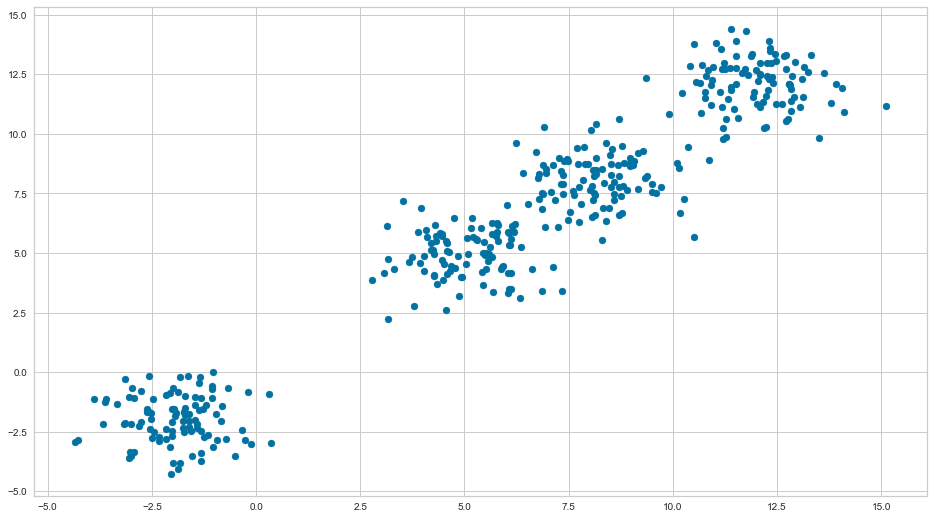

In [211]:
plt.scatter(df['A'],df['B'])
plt.show()

### A simple vista se ven 4 clusters

In [212]:
## En este caso probaremos con 2 clusters a modo de experimientación

In [213]:
k_means = KMeans(n_clusters=2)
k_means.fit(df)

KMeans(n_clusters=2)

In [214]:
k_means.cluster_centers_

array([[ 8.42460812,  8.39819198],
       [-1.87393293, -1.9254255 ]])

In [215]:
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [216]:
k_means.inertia_

5728.229140045012

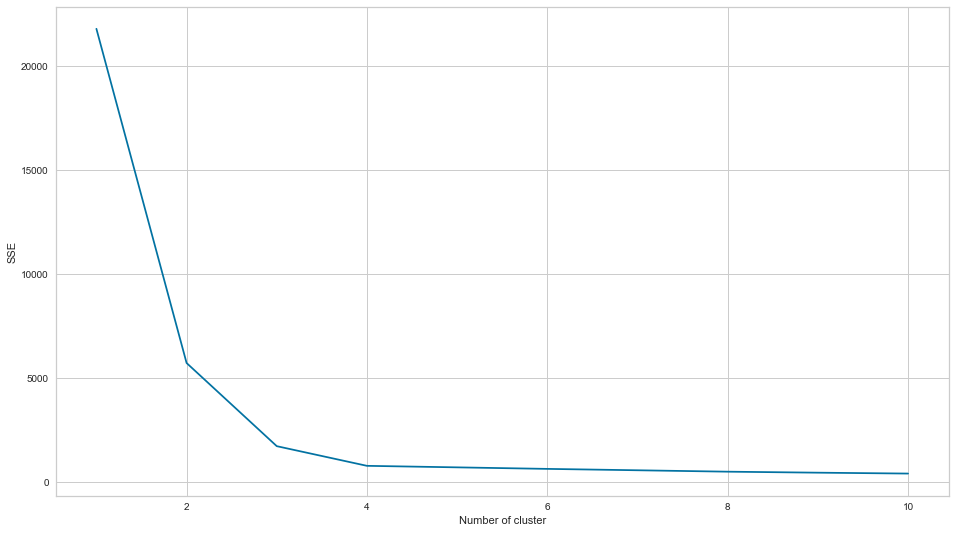

In [217]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df)
    sse[k] = kmeans.inertia_  #retorna la suma de las distancias al 
                              #cuadrado desde cada punto al centroide del cluster más cercano
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [218]:
### Viendo grafico con 4 clusters

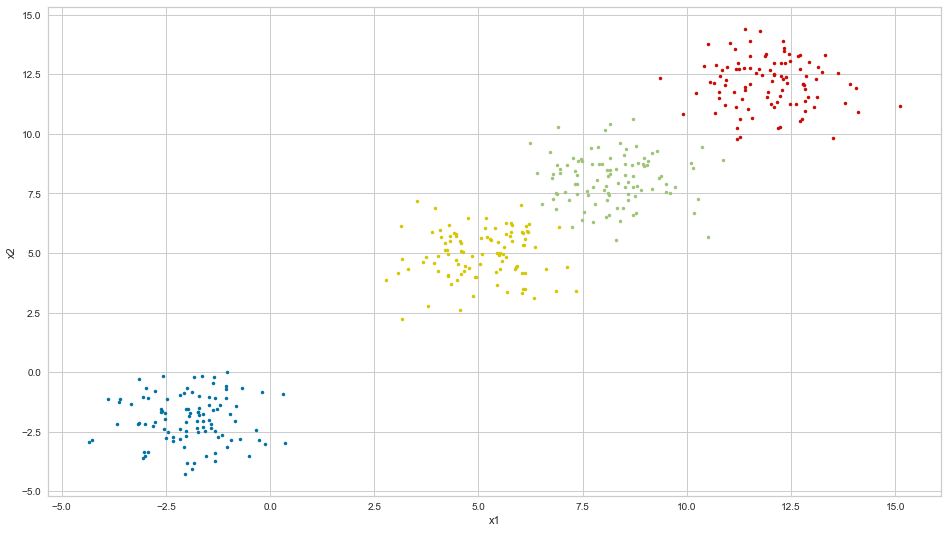

In [219]:
k_means = KMeans(n_clusters=4)
k_means.fit(df)
df['clase'] = k_means.labels_
colores = ['r.', 'b.', 'y.', 'g.']
for i in range(0,4):
    plt.plot(df['A'][df['clase']==i],df['B'][df['clase']==i],colores[i])
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

### Segun la metodología del codo el número optimo de clusters es de 4 para este caso y aquí lo graficamos.

# Análisis de clusters

In [220]:
#en este caso usamos el archivo kmeans2 porque no se encontro k-means2 como dice el archivo del proyecto
df = pd.read_csv('kmeans2.csv')
#visualizamos el DF 
df


,Unnamed: 0,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0,0.02700,0.000000,3,0.270000,0.0190,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,1,0.21400,0.000000,18,0.346667,0.1260,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,2,0.27050,0.000000,1,0.223333,0.2320,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,3,0.34250,0.000000,13,0.396667,-0.0170,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,4,0.01075,0.097155,1,0.313830,-0.0020,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,0.04000,0.112777,2,0.340000,0.0040,-0.000014,1.689189,13.335943,0.001613,0.0155,0.420000,0.004724,17.743225
4996,4996,0.21250,0.000000,50,0.463333,-0.0655,-0.000224,11.590296,14.113617,0.009283,0.1250,0.303333,0.018120,1375.234215
4997,4997,0.02175,0.030271,4,0.333333,0.0100,-0.000031,0.014262,14.477476,0.000819,0.0090,0.295238,0.002141,1111.578564
4998,4998,0.02650,0.446972,2,0.313333,0.0030,0.000013,0.140885,13.661500,0.000972,0.0090,0.430000,0.003221,2866.316360


c:\users\sonny\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


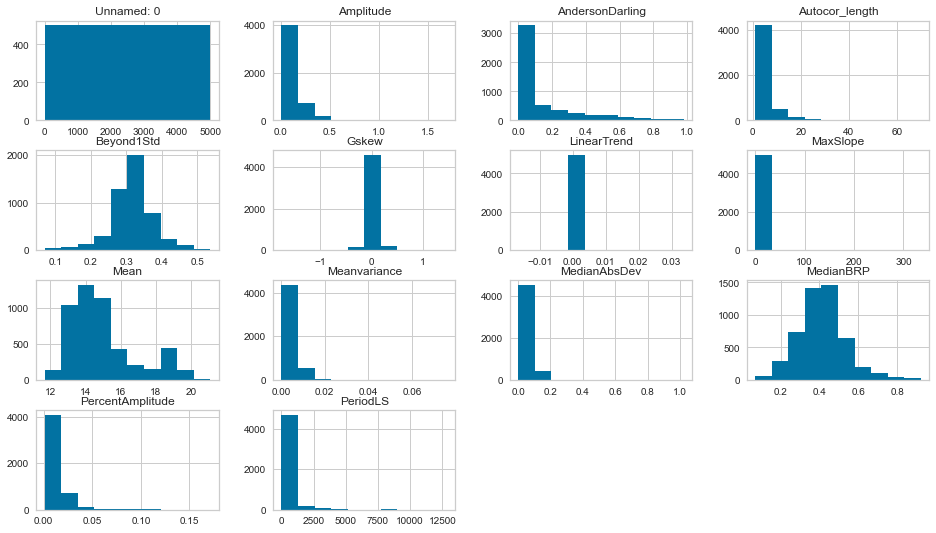

In [221]:
##graficamos el df
df.hist()
plt.show()

In [222]:
df.dtypes
##Podemos apreciar varias dimensiones donde todas son numericas y donde existe un identificador
##llamado Unnamed que probablemente sea un index o llave primaria no aporta mucho en este caso

Unnamed: 0            int64
Amplitude           float64
AndersonDarling     float64
Autocor_length        int64
Beyond1Std          float64
Gskew               float64
LinearTrend         float64
MaxSlope            float64
Mean                float64
Meanvariance        float64
MedianAbsDev        float64
MedianBRP           float64
PercentAmplitude    float64
PeriodLS            float64
dtype: object

In [223]:
df.mean ##podemos apreciar las medias de todos los atributos o dimensiones

<bound method NDFrame._add_numeric_operations.<locals>.mean of       Unnamed: 0  Amplitude  AndersonDarling  Autocor_length  Beyond1Std  \
0              0    0.02700         0.000000               3    0.270000   
1              1    0.21400         0.000000              18    0.346667   
2              2    0.27050         0.000000               1    0.223333   
3              3    0.34250         0.000000              13    0.396667   
4              4    0.01075         0.097155               1    0.313830   
...          ...        ...              ...             ...         ...   
4995        4995    0.04000         0.112777               2    0.340000   
4996        4996    0.21250         0.000000              50    0.463333   
4997        4997    0.02175         0.030271               4    0.333333   
4998        4998    0.02650         0.446972               2    0.313333   
4999        4999    0.03600         0.031931               6    0.336667   

       Gskew  LinearTren

In [224]:
df.std ## podemos apreciar la desviación estandar de los atributos

<bound method NDFrame._add_numeric_operations.<locals>.std of       Unnamed: 0  Amplitude  AndersonDarling  Autocor_length  Beyond1Std  \
0              0    0.02700         0.000000               3    0.270000   
1              1    0.21400         0.000000              18    0.346667   
2              2    0.27050         0.000000               1    0.223333   
3              3    0.34250         0.000000              13    0.396667   
4              4    0.01075         0.097155               1    0.313830   
...          ...        ...              ...             ...         ...   
4995        4995    0.04000         0.112777               2    0.340000   
4996        4996    0.21250         0.000000              50    0.463333   
4997        4997    0.02175         0.030271               4    0.333333   
4998        4998    0.02650         0.446972               2    0.313333   
4999        4999    0.03600         0.031931               6    0.336667   

       Gskew  LinearTrend

In [225]:
##Visualizamos el DF pero como son muchas dimensiones o atributos lo ideal sería primero normalizar
##para luego reducir las dimensiones

## eliminamos la columna que no aporta ningun valor
df_ = df.drop(columns=['Unnamed: 0'])

## normalizamos nuestro nuevo df
norm = StandardScaler()
df_std = norm.fit_transform(df_)

## reducimos dimensiones con PCA a 2 dimensiones

pca = PCA(n_components=2)
df_transformado = pca.fit_transform(df_std)
df_transformado = pd.DataFrame(df_transformado, columns = ['C1', 'C2'])

##visualizamos y respaldamos para futuros usos del DF normalizado y reducido a 2 dimensiones
df_respaldo = df_transformado.copy()

<AxesSubplot:xlabel='C1', ylabel='C2'>

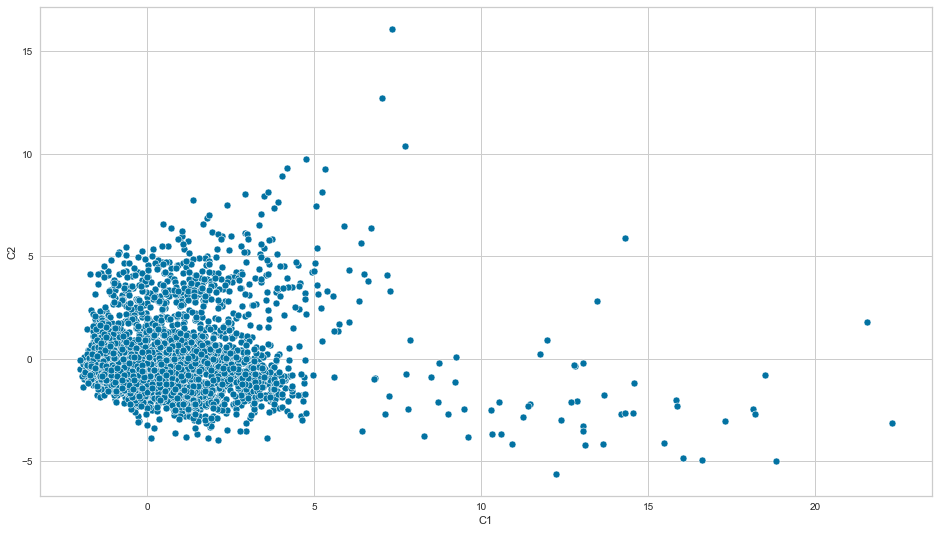

In [226]:
##graficamos el resultado con 2 dimensiones
sns.scatterplot(data=df_transformado, x="C1", y="C2")


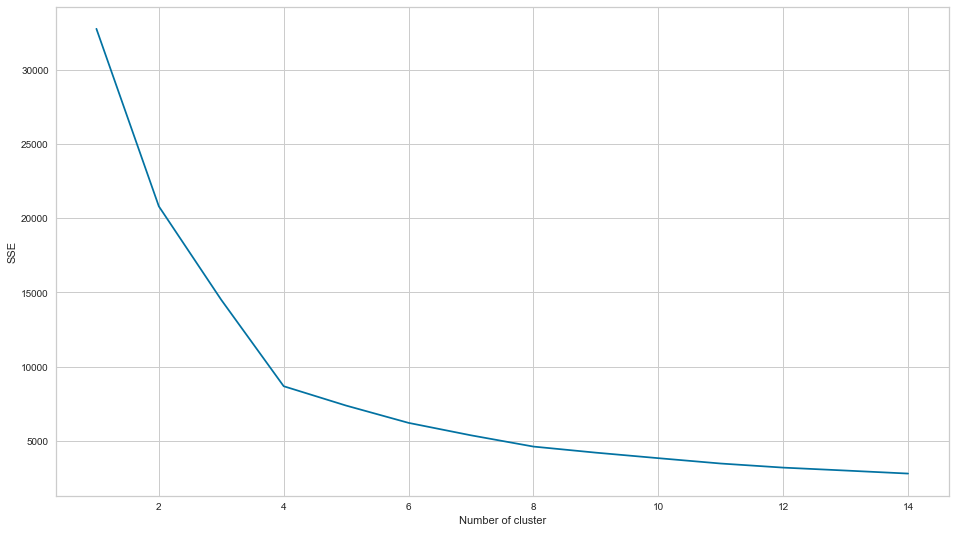

In [227]:
##aplicamos k-means y el numero optimo de clusters con la metodologia del codo
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_transformado)
    sse[k] = kmeans.inertia_  #retorna la suma de las distancias al 
                              #cuadrado desde cada punto al centroide del cluster más cercano
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()



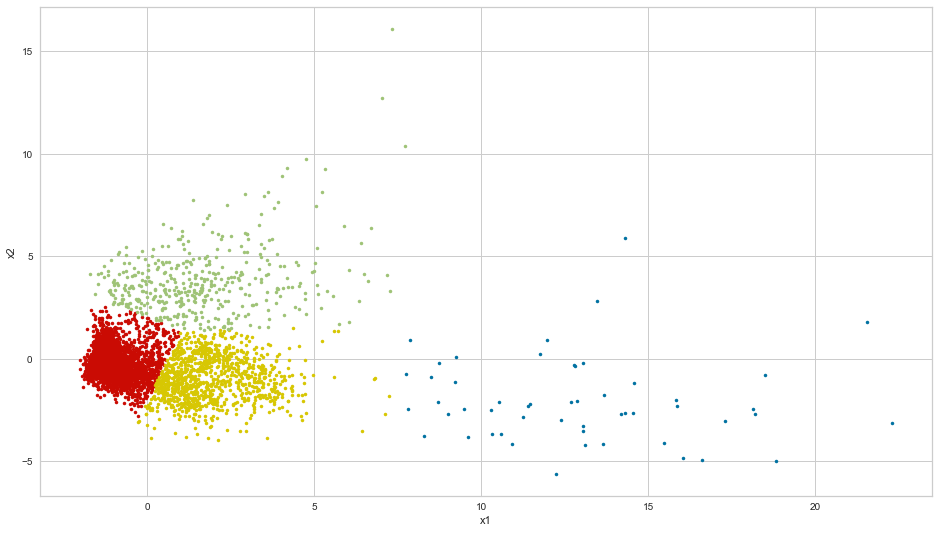

In [228]:
##considero 4 un buen numero para los clusters
## ejecutamos kmeans con 4

k_means = KMeans(n_clusters=4)
k_means.fit(df_transformado)
df_transformado['clase'] = k_means.labels_
colores = ['r.', 'b.', 'y.', 'g.']
for i in range(0,4):
    plt.plot(df_transformado['C1'][df_transformado['clase']==i],df_transformado['C2'][df_transformado['clase']==i],colores[i])
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

In [229]:
centroides = k_means.cluster_centers_
centroides
##podemos apreciar que el centroide mas alejado es el 12.89,-2.04 con mayor grado de dispersión
##luego los otros estan relativamente cercanos 

array([[-0.97015719, -0.13512786],
       [12.8896012 , -2.04756778],
       [ 1.86352306, -0.98061963],
       [ 1.58342568,  3.77129623]])

In [230]:
def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [231]:
#Invocamos la clase agglomerative clustering

clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

clustering = clustering.fit(df_respaldo)

labels = clustering.labels_




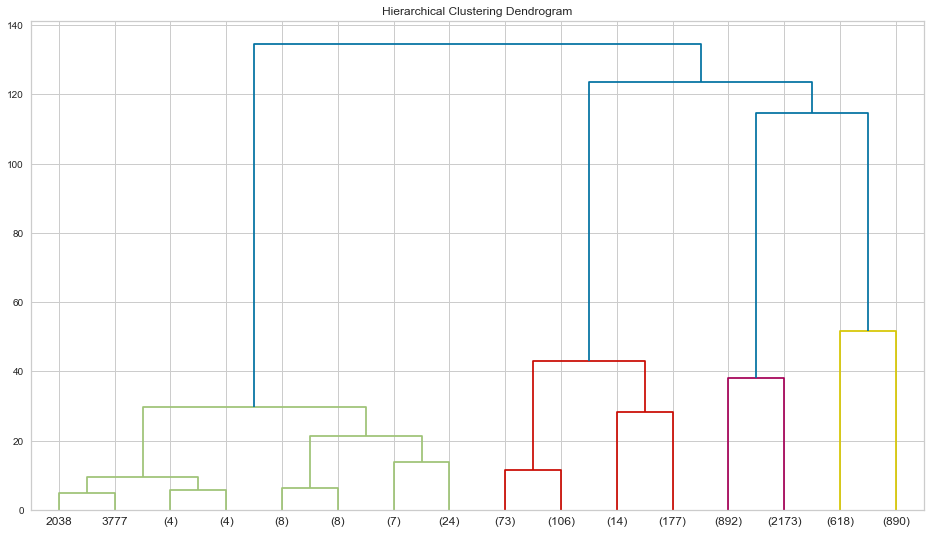

In [232]:
plt.title('Hierarchical Clustering Dendrogram')

plot_dendrogram(clustering, truncate_mode='level', p=3)


plt.show()


### En este caso podemos apreciar 4 clusters representados por cada color (Cluster Jerarquico)

## Procedemos a utilizar gaussian mixture model

### Gaussian mixture models es un modelo probabilistico para aprendizaje no supervisado el cual se puede mesclar con k-means para obtener un mejor resultado mas conocido como GMM en el cual en sus hiperparametros podemos darle tanto la cantidad de componentes que por lo general son mas de 2 y su principal diferencia es la forma de agrupar los clusters vs k-means

In [233]:
##Implemetando Gaussian Mixture Model
from sklearn.mixture import GaussianMixture
import scipy.stats
##usamos el df de resplado que creamos para estos casos
gmm = GaussianMixture(n_components = 4, init_params='kmeans').fit(df_respaldo)
labels = gmm.predict(df_respaldo)

X = df_respaldo.values
centers = np.empty(shape=(gmm.n_components, X.shape[1]))
for i in range(gmm.n_components):
    
    density = scipy.stats.multivariate_normal(cov = gmm.covariances_[i], mean = gmm.means_[i]).logpdf(X)
    
    centers[i,:] = X[np.argmax(density)]

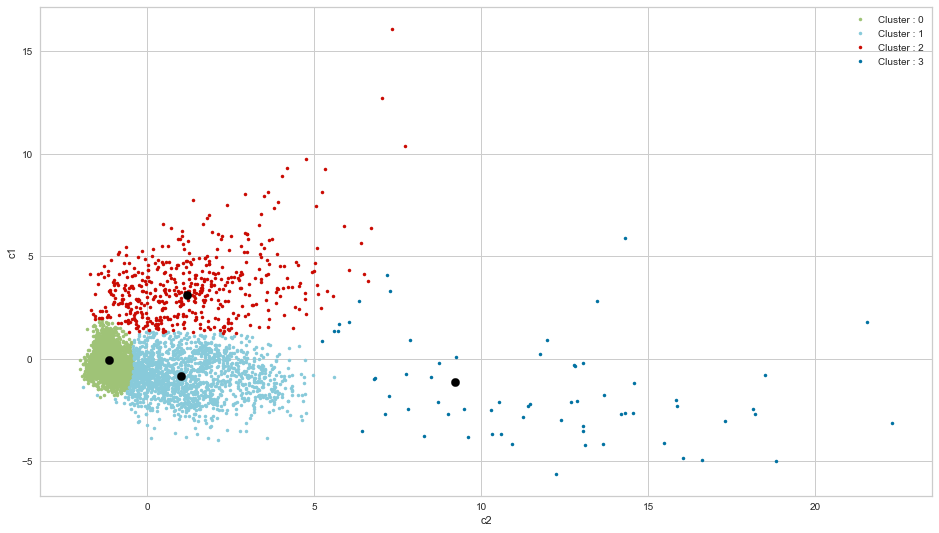

In [234]:
colores=['g.','c.','r.', 'b.']

for i in range(4):# 0,1
    plt.plot(df_respaldo['C1'][labels==i], df_respaldo['C2'][labels==i], colores[i], label = 'Cluster : '+str(i))

plt.scatter(centers[:,0], centers[:,1], s=70, color='black', zorder = 15)

plt.ylabel('c1')
plt.xlabel('c2')
plt.legend()
plt.show()

### Comparando Gaussian vs Kmeans podemos apreciar ciertas similitudes desde el punto de vista visual a 4 clusters sin embargo siento que para este caso gaussian se comporta mejor mas que todo por la figura que posee este dataset y como agrupa los clusters. En mi opinión lo mejor sería utilizar kmeans como parametro inicial en GMM

In [235]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from sklearn.metrics import davies_bouldin_score


 ## Midiendo con davies bouldin en k-means

In [236]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_respaldo)    
    labels = kmeans.labels_
    print(str(k)+' clusters')
    index = davies_bouldin_score(df_respaldo, labels)
    print('Davies Bouldin score='+ str(index))   

2 clusters
Davies Bouldin score=1.0109359930841746
3 clusters
Davies Bouldin score=0.7893259481004261
4 clusters
Davies Bouldin score=0.6537888647785121
5 clusters
Davies Bouldin score=0.7838870834761
6 clusters
Davies Bouldin score=0.8393600409402727
7 clusters
Davies Bouldin score=0.8008875622773056
8 clusters
Davies Bouldin score=0.8269540945364755
9 clusters
Davies Bouldin score=0.8133312002782308


### Podemos apreciar que para este caso según davies bouldin el numero optimo de clusters es 4

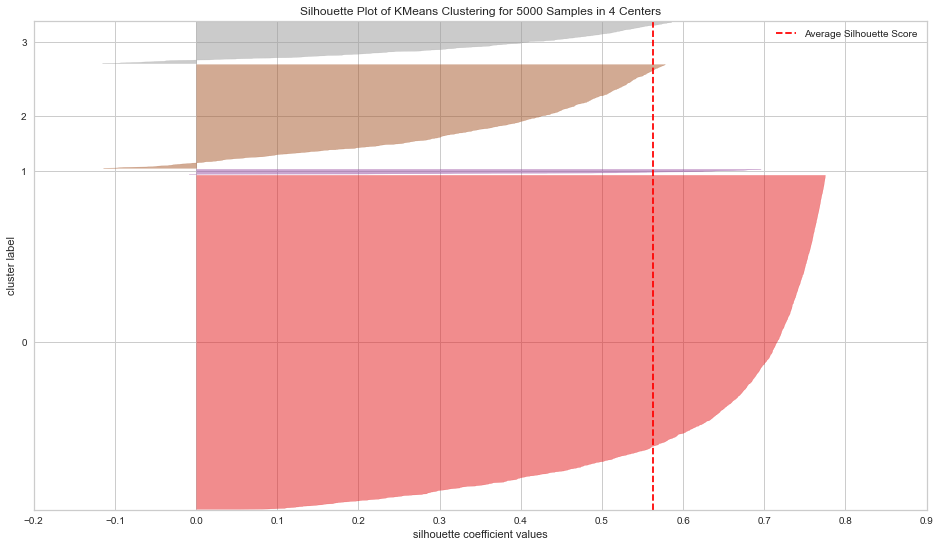

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 5000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [237]:
##graficamos
kmeans = KMeans(n_clusters=4, max_iter=1000).fit(df_respaldo)    

plot = SilhouetteVisualizer(kmeans)
plot.fit(df_respaldo)       
plot.show()   



### Podemos apreciar que tienen un coherencia sobre 0.5 mas cercano a 1 

Text(0.5, 0, 'n_componentes')

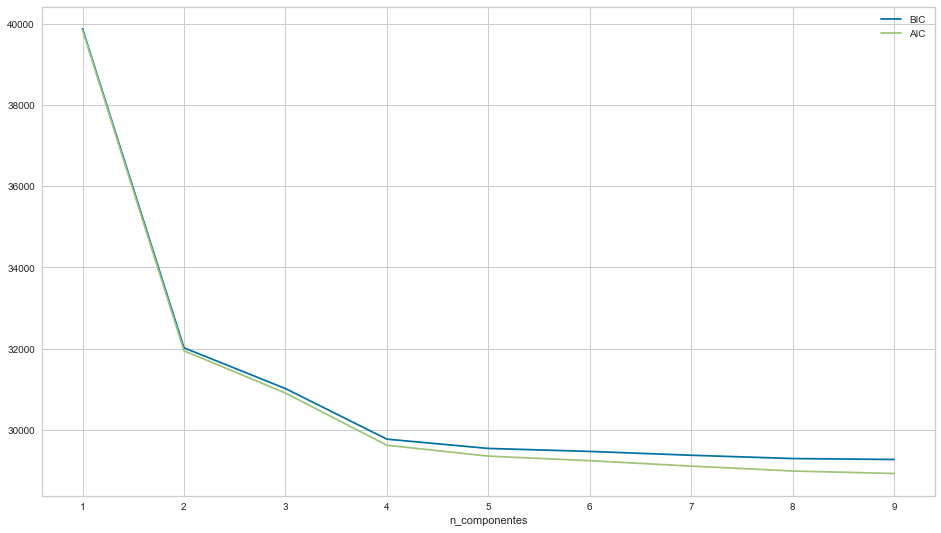

In [238]:
### Determinar el número de (componentes = n clusters) para GMM
n_componentes = np.arange(1,10)

modelos = [GaussianMixture(n, covariance_type = 'full', random_state = 0).fit(df_respaldo)
           for n in n_componentes]

plt.plot(n_componentes, [ m.bic(df_respaldo) for m in modelos], label = 'BIC')

plt.plot(n_componentes, [ m.aic(df_respaldo) for m in modelos], label = 'AIC')

plt.legend(loc='best')
plt.xlabel('n_componentes')

In [208]:
## Podemos apreciar que son similares y según mi opinión 4 clusters es el numero optimo